### Streaming History (audio, video, and podcasts)

A list of items (e.g. songs, videos, and podcasts) listened to or watched in the past year, including:

* Date and time of when the stream ended in UTC format (Coordinated Universal Time zone).
* Name of "creator" for each stream (e.g. the artist name if a music track).
* Name of items listened to or watched (e.g. title of music track or name of video). 
* “msPlayed”- Stands for how many mili-seconds the track was listened. 

### To investigate
* How did Sanremo affect the artists and frequency of listening
* What do we listen more in the evening/morning/afternoon?
* How many new artists have we discovered in the different months? Does it match with Sanremo?

In [157]:
import pandas as pd

In [158]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 5]

**Load data**

In [159]:
data = pd.read_json("./data/StreamingHistory0.json",
                   convert_dates=['endTime'])

In [160]:
data.head()

,endTime,artistName,trackName,msPlayed
0,2020-04-18 20:54:00,Billie Eilish,all the good girls go to hell,94923
1,2020-04-19 16:49:00,Klaus Badelt,Eloi,0
2,2020-04-19 16:49:00,Klaus Badelt,Eloi,3620
3,2020-04-19 16:49:00,Hans Zimmer,Run Free,142333
4,2020-04-19 16:49:00,London Music Works,"No Time for Caution (From ""Interstellar"")",295


In [161]:
data.describe(include='all')

<ipython-input-161-589a52936347>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


,endTime,artistName,trackName,msPlayed
count,6493,6493,6493,6.493000e+03
unique,4653,984,2010,NaN
top,2020-05-11 17:21:00,Arctic Monkeys,"This Land - From ""The Lion King""/Score",NaN
freq,39,585,75,NaN
first,2020-04-18 20:54:00,NaN,NaN,NaN
last,2021-04-17 11:38:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.426641e+05
std,NaN,NaN,NaN,1.969985e+05
min,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,5.610000e+03


**Missing values**

In [162]:
data.isna().sum()

endTime       0
artistName    0
trackName     0
msPlayed      0
dtype: int64

**Add time columns**

In [163]:
data['year'] = data.endTime.dt.year
data['year_month'] = data.endTime.dt.to_period('M')
data['hour'] = data.endTime.dt.hour

In [164]:
data.head()

,endTime,artistName,trackName,msPlayed,year,year_month,hour
0,2020-04-18 20:54:00,Billie Eilish,all the good girls go to hell,94923,2020,2020-04,20
1,2020-04-19 16:49:00,Klaus Badelt,Eloi,0,2020,2020-04,16
2,2020-04-19 16:49:00,Klaus Badelt,Eloi,3620,2020,2020-04,16
3,2020-04-19 16:49:00,Hans Zimmer,Run Free,142333,2020,2020-04,16
4,2020-04-19 16:49:00,London Music Works,"No Time for Caution (From ""Interstellar"")",295,2020,2020-04,16


### General distributions

**Most popular artists**

<AxesSubplot:>

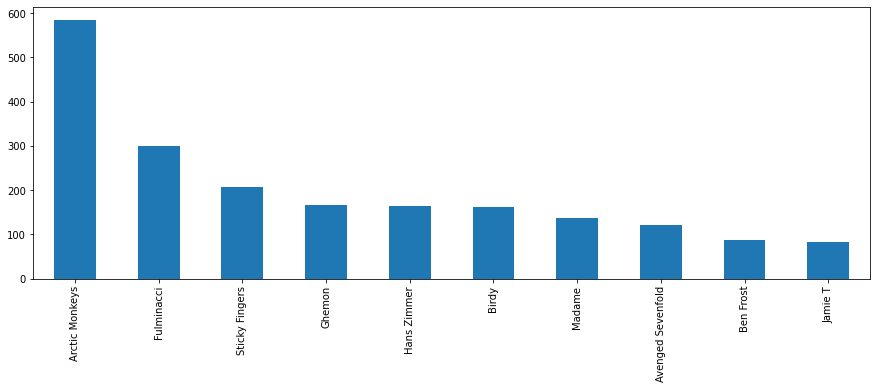

In [165]:
top_artists= data.artistName.value_counts().sort_values(ascending=False).head(10)
top_artists.plot(kind='bar')

Arctic monkeys and Fulminacci are the most popular over the last year. But what do they distribution over time look like? Is it stable or does it have peaks?

In [166]:
df = data[data.artistName.isin(top_artists.index)] \
        .groupby(['year_month', 'artistName']).count().msPlayed.reset_index()

<AxesSubplot:xlabel='year_month'>

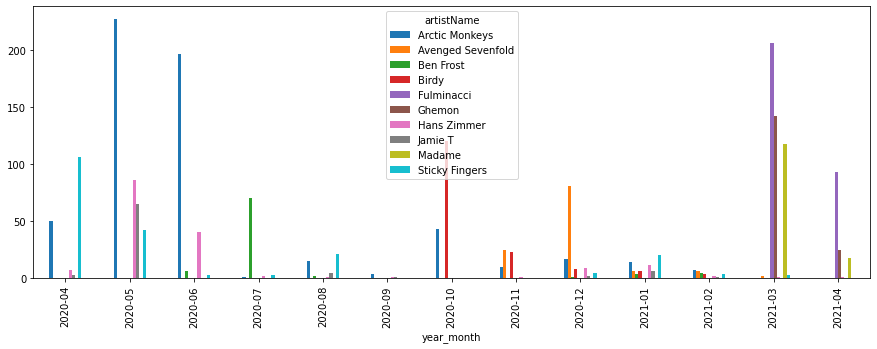

In [167]:
df.pivot(index="year_month", columns='artistName')['msPlayed'].fillna(0).plot(kind='bar')

**Most popular songs**

<AxesSubplot:>

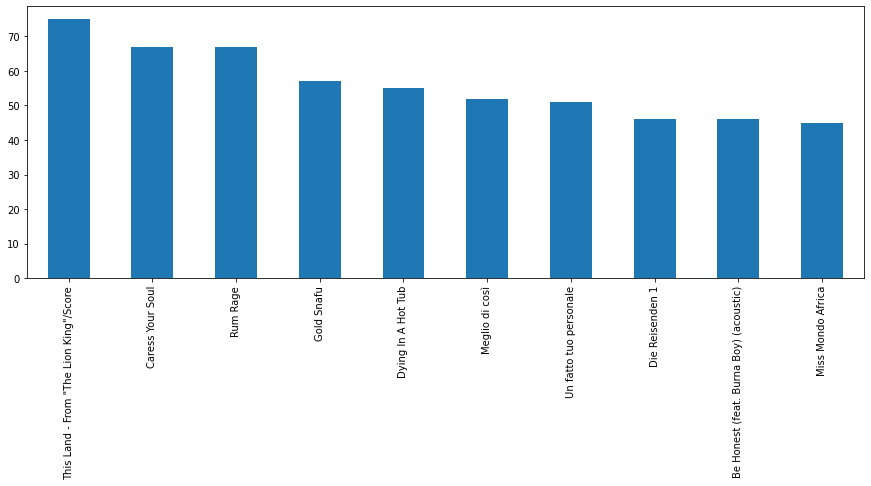

In [168]:
top_songs = data.trackName.value_counts().sort_values(ascending=False).head(10)
top_songs.plot(kind='bar')

In [169]:
df = data[data.trackName.isin(top_songs.index)] \
        .groupby(['year_month', 'trackName']).count().msPlayed.reset_index()

<AxesSubplot:xlabel='year_month'>

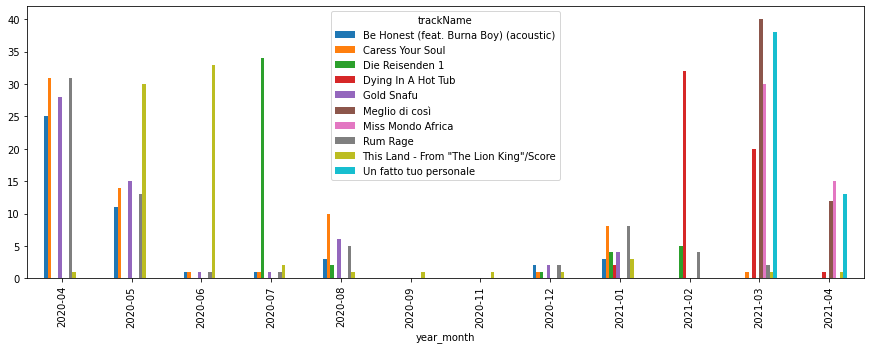

In [170]:
df.pivot(index="year_month", columns='trackName')['msPlayed'].fillna(0).plot(kind='bar')

**Most active months**

<AxesSubplot:>

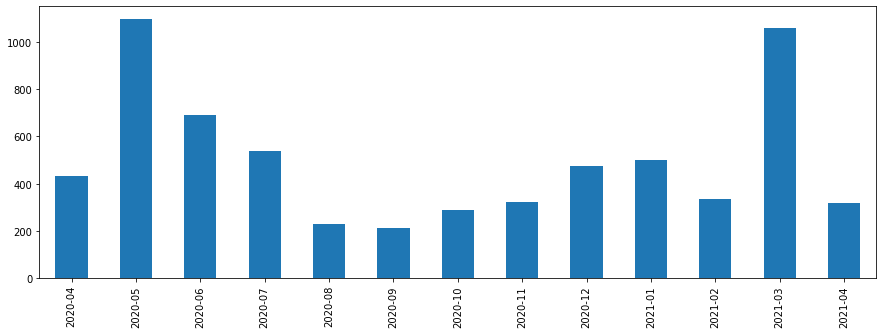

In [171]:
data.year_month.value_counts().sort_index(ascending=True).plot(kind='bar')

**Habits during spring semester in Denmark**

In [172]:
spring_semester_period = (data.year_month >= "2020-03") & (data.year_month <= "2020-06")

<AxesSubplot:>

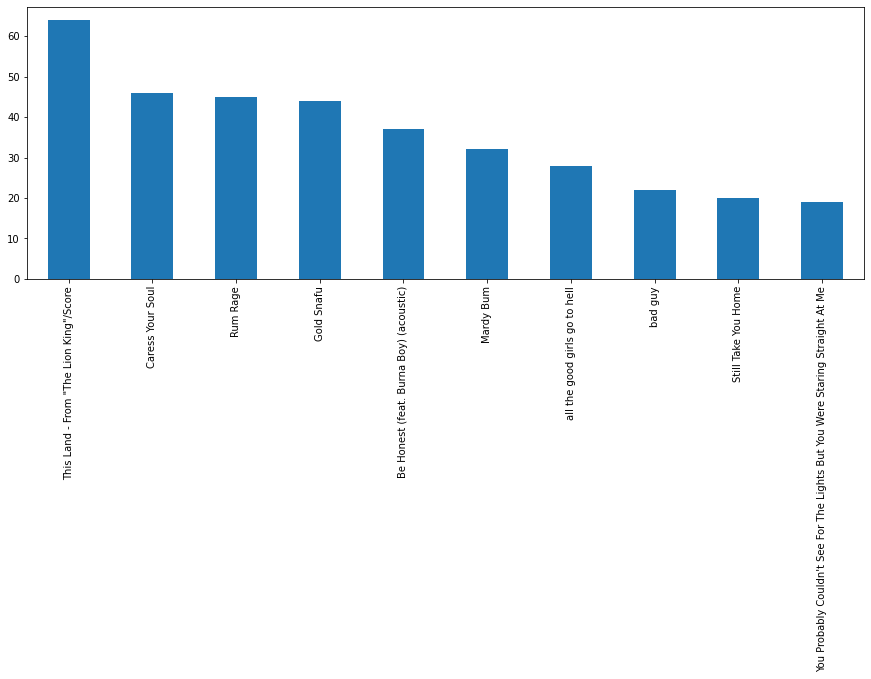

In [173]:
data[spring_semester_period].trackName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:>

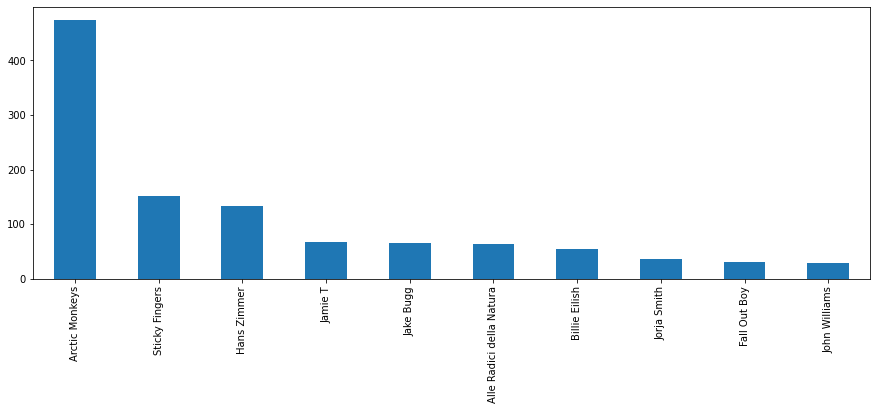

In [174]:
data[spring_semester_period].artistName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

**Habits during Sanremo**

In [175]:
sanremo_period = (data.year_month >= "2021-03") & (data.year_month <= "2021-03")

<AxesSubplot:>

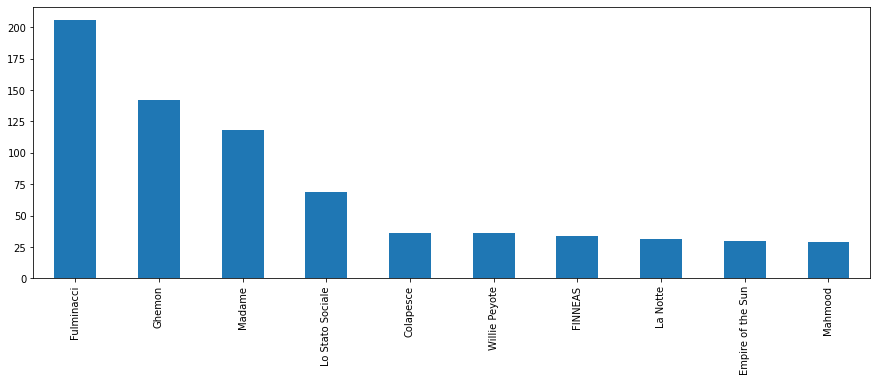

In [176]:
data[sanremo_period].artistName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

<AxesSubplot:>

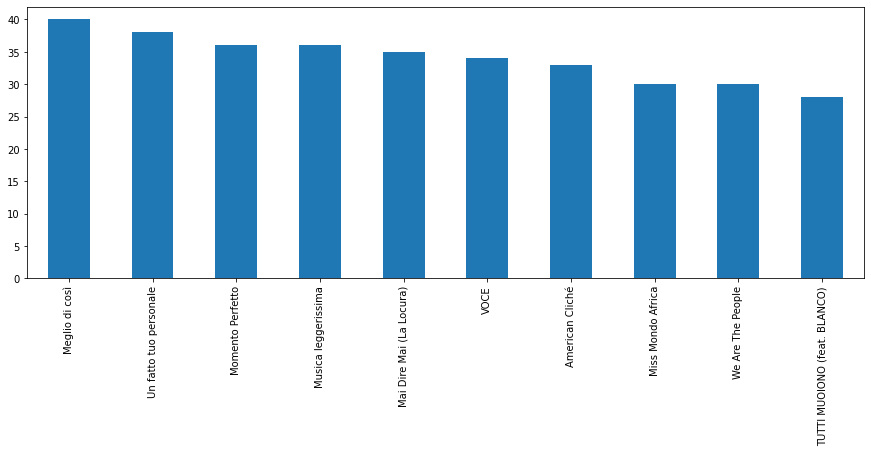

In [177]:
data[sanremo_period].trackName.value_counts()\
                .sort_values(ascending=False).head(10).plot(kind='bar')

**Hometown Glory habits**

<AxesSubplot:>

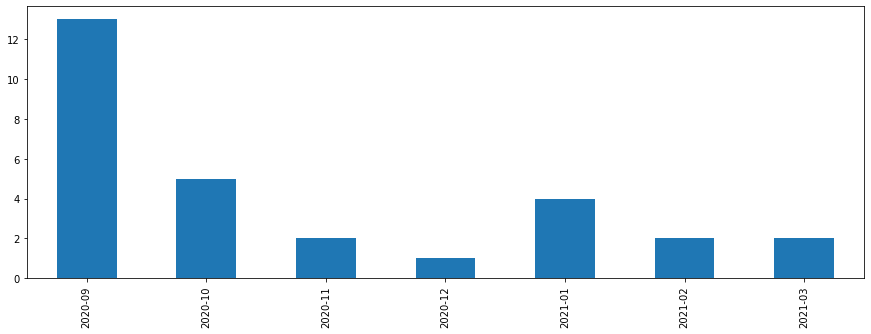

In [178]:
data[data.trackName.str.contains('Hometown Glory')]\
            .year_month.value_counts()\
                .sort_index(ascending=True).head(10).plot(kind='bar')